In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [4]:
data = pd.read_excel('champagne_new.xlsx', index_col = 0)
data.head()

,monthly_champange
Month,
1964-01-01,2815
1964-02-01,2672
1964-03-01,2755
1964-04-01,2721
1964-05-01,2946


In [5]:
data.tail()

,monthly_champange
Month,
1972-05-01,4618
1972-06-01,5312
1972-07-01,4298
1972-08-01,1413
1972-09-01,5877


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 105 entries, 1964-01-01 to 1972-09-01
Data columns (total 1 columns):
monthly_champange    105 non-null int64
dtypes: int64(1)
memory usage: 1.6 KB


In [7]:
data.index = pd.to_datetime(data.index)

In [8]:
data.index

DatetimeIndex(['1964-01-01', '1964-02-01', '1964-03-01', '1964-04-01',
               '1964-05-01', '1964-06-01', '1964-07-01', '1964-08-01',
               '1964-09-01', '1964-10-01',
               ...
               '1971-12-01', '1972-01-01', '1972-02-01', '1972-03-01',
               '1972-04-01', '1972-05-01', '1972-06-01', '1972-07-01',
               '1972-08-01', '1972-09-01'],
              dtype='datetime64[ns]', name='Month', length=105, freq=None)

==> Nhận xét ban đầu về dữ liệu: Dữ liệu không bị thiếu, nhưng số lượng khá ít (khoảng 8 năm).

** Decomposition and visualization:

c:\users\khang\appdata\local\programs\python\python37-32\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


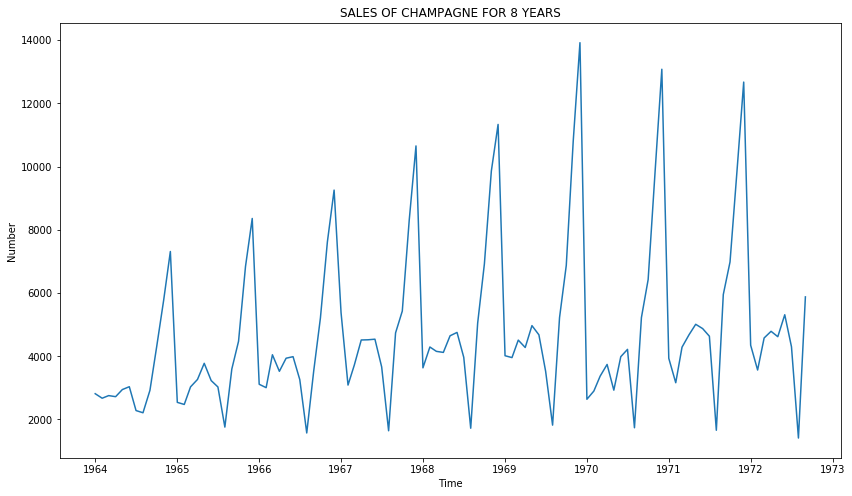

In [9]:
from datetime import datetime

plt.figure(figsize = (14,8))
plt.plot(data)
plt.xlabel('Time')
plt.ylabel('Number')
plt.title('SALES OF CHAMPAGNE FOR 8 YEARS')
plt.show()

==> Nhận xét: Em thấy việc bán champagne tăng từ năm 1964 đến 1970, sau năm 1970 thì có xu hướng không tăng, giảm nhẹ trong những lúc đầu năm, còn những tháng trong năm thì sụt giảm trong khoảng 1970-1971, sau đó tăng lại bình thường. Nói chung dữ liệu khá biến động.

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(x = data, model = 'multiplicative')
result

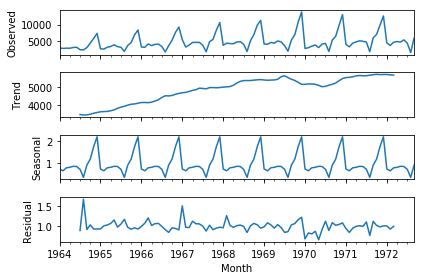

In [9]:
result.plot()
plt.show()

==> Nhìn vào trend, em thấy có xu hướng tăng, nhưng có giai đoạn sụt giảm rồi tăng nhẹ rồi ngang bằng

** ARIMA:

In [10]:
from pmdarima.arima import auto_arima

In [11]:
model_1 = auto_arima(data, start_p = 1, start_q = 1, max_p = 3, max_q = 3, m = 12, start_P = 0, seasonal = True, d = 1,
                    D = 1, trace = True, error_action='ignore', suppress_warnings = True, stepwise = True) 

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=1485.185, BIC=1497.794, Fit time=1.815 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=1526.661, BIC=1531.705, Fit time=0.014 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=1509.055, BIC=1519.143, Fit time=0.516 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=1490.560, BIC=1500.647, Fit time=0.880 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=1486.286, BIC=1501.417, Fit time=2.170 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=1488.213, BIC=1498.300, Fit time=0.385 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 2, 12); AIC=1486.096, BIC=1501.227, Fit time=4.680 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=1488.089, BIC=1505.742, Fit time=5.634 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=1487.181, BIC=1502.312, Fit time=1.967 seconds
Fit ARIMA: order=(1, 1, 0) s

In [12]:
print("AIC: ", model_1.aic())

AIC:  1485.1852600015864


==> It is not big compared to the range of dataset

** After creating model, we move to split dataset and train this model:

In [13]:
data.shape

(105, 1)

In [14]:
0.75*105

78.75

==> 75% data for train, so we will select data from row number 0 to 79, and remaining rows are for testing

In [15]:
train = data.iloc[:79, :]
train.head()

,monthly_champange
Month,
1964-01-01,2815
1964-02-01,2672
1964-03-01,2755
1964-04-01,2721
1964-05-01,2946


In [16]:
train.tail()

,monthly_champange
Month,
1970-03-01,3370
1970-04-01,3740
1970-05-01,2927
1970-06-01,3986
1970-07-01,4217


In [17]:
test = data.iloc[79:, :]
test.head()

,monthly_champange
Month,
1970-08-01,1738
1970-09-01,5221
1970-10-01,6424
1970-11-01,9842
1970-12-01,13076


In [18]:
model_1.fit(train)

ARIMA(callback=None, disp=0, maxiter=None, method=None, order=(1, 1, 1),
   out_of_sample_size=0, scoring='mse', scoring_args={},
   seasonal_order=(0, 1, 1, 12), solver='lbfgs', start_params=None,
   suppress_warnings=True, transparams=True, trend=None,
   with_intercept=True)

In [19]:
future_forcast = model_1.predict(n_periods = len(test))
future_forcast

array([ 1848.49462049,  5115.672168  ,  6738.91705157, 10597.74433654,
       13609.6140756 ,  2532.45981833,  2762.34214839,  3221.30600118,
        3544.93690727,  2797.79925219,  3770.72272242,  3913.67435339,
        1564.94254901,  4824.48961438,  6435.07989027, 10280.33146901,
       13278.45663215,  2187.52683922,  2403.6279576 ,  2848.80955811,
        3158.65802113,  2397.73788801,  3356.87887379,  3486.04801913,
        1123.5337289 ,  4369.29830839])

In [20]:
future = pd.DataFrame(future_forcast, index = test.index, columns = ['Prediction'])

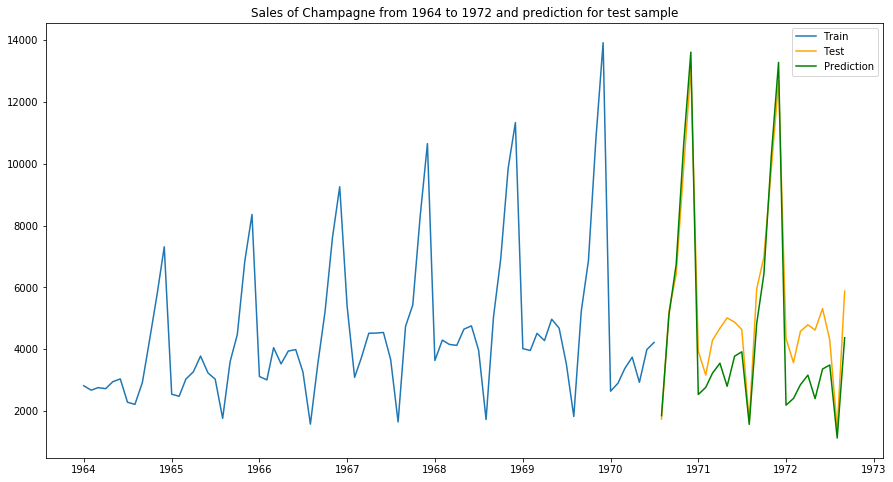

In [21]:
plt.figure(figsize = (15,8))
plt.plot(train, label = 'Train')
plt.plot(test, c = 'orange', label = 'Test')
plt.plot(future, c = 'green', label = 'Prediction')
plt.title('Sales of Champagne from 1964 to 1972 and prediction for test sample')
plt.legend()
plt.show()

==> Tuy có đôi chút sai lầm, nhưng nhìn chung model dự đoán khá tốt trên tập test

** Dự đoán cho 9 tháng sau:

In [22]:
next_9_months = model_1.predict(n_periods=len(test) + 9)
next_9_months

array([ 1848.49462049,  5115.672168  ,  6738.91705157, 10597.74433654,
       13609.6140756 ,  2532.45981833,  2762.34214839,  3221.30600118,
        3544.93690727,  2797.79925219,  3770.72272242,  3913.67435339,
        1564.94254901,  4824.48961438,  6435.07989027, 10280.33146901,
       13278.45663215,  2187.52683922,  2403.6279576 ,  2848.80955811,
        3158.65802113,  2397.73788801,  3356.87887379,  3486.04801913,
        1123.5337289 ,  4369.29830839,  5966.10609839,  9797.57519124,
       12781.91786848,  1677.20558966,  1879.52422215,  2310.92333676,
        2606.98931389,  1832.28669488,  2777.64519476])

In [23]:
range_month = []

for i in range(8, 13):
    month = datetime(1970, i, 1)
    range_month.append(month)

for i in range(1971, 1973):
    for j in range(1, 13):
        month = datetime(i, j, 1)      
        range_month.append(month)
        
for i in range(1, 7):
    month = datetime(1973, i, 1)
    range_month.append(month)
        
range_month

[datetime.datetime(1970, 8, 1, 0, 0),
 datetime.datetime(1970, 9, 1, 0, 0),
 datetime.datetime(1970, 10, 1, 0, 0),
 datetime.datetime(1970, 11, 1, 0, 0),
 datetime.datetime(1970, 12, 1, 0, 0),
 datetime.datetime(1971, 1, 1, 0, 0),
 datetime.datetime(1971, 2, 1, 0, 0),
 datetime.datetime(1971, 3, 1, 0, 0),
 datetime.datetime(1971, 4, 1, 0, 0),
 datetime.datetime(1971, 5, 1, 0, 0),
 datetime.datetime(1971, 6, 1, 0, 0),
 datetime.datetime(1971, 7, 1, 0, 0),
 datetime.datetime(1971, 8, 1, 0, 0),
 datetime.datetime(1971, 9, 1, 0, 0),
 datetime.datetime(1971, 10, 1, 0, 0),
 datetime.datetime(1971, 11, 1, 0, 0),
 datetime.datetime(1971, 12, 1, 0, 0),
 datetime.datetime(1972, 1, 1, 0, 0),
 datetime.datetime(1972, 2, 1, 0, 0),
 datetime.datetime(1972, 3, 1, 0, 0),
 datetime.datetime(1972, 4, 1, 0, 0),
 datetime.datetime(1972, 5, 1, 0, 0),
 datetime.datetime(1972, 6, 1, 0, 0),
 datetime.datetime(1972, 7, 1, 0, 0),
 datetime.datetime(1972, 8, 1, 0, 0),
 datetime.datetime(1972, 9, 1, 0, 0),
 datet

In [24]:
next_9_months = pd.DataFrame(next_9_months, index = range_month, columns = ['Prediction2'])
next_9_months

,Prediction2
1970-08-01,1848.494620
1970-09-01,5115.672168
1970-10-01,6738.917052
1970-11-01,10597.744337
1970-12-01,13609.614076
1971-01-01,2532.459818
1971-02-01,2762.342148
1971-03-01,3221.306001
1971-04-01,3544.936907
1971-05-01,2797.799252


In [25]:
next_9_months.iloc[len(test):,:]

,Prediction2
1972-10-01,5966.106098
1972-11-01,9797.575191
1972-12-01,12781.917868
1973-01-01,1677.205590
1973-02-01,1879.524222
1973-03-01,2310.923337
1973-04-01,2606.989314
1973-05-01,1832.286695
1973-06-01,2777.645195


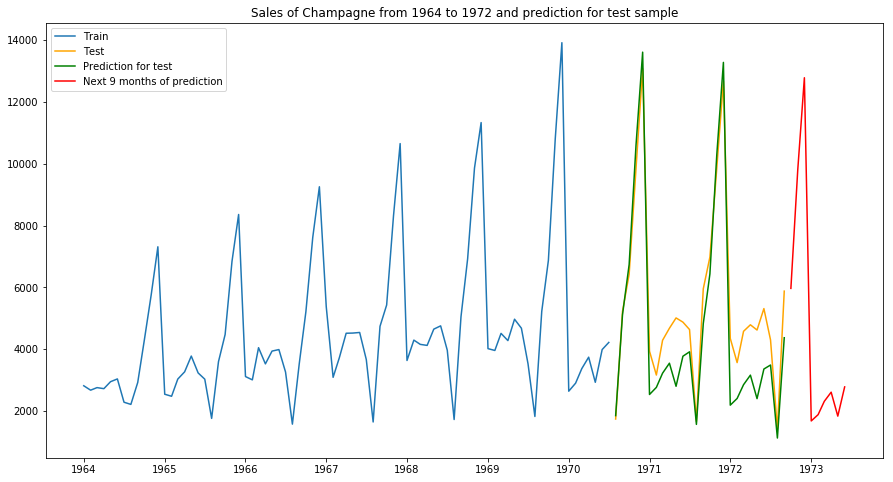

In [26]:
plt.figure(figsize = (15,8))
plt.plot(train, label = 'Train')
plt.plot(test, c = 'orange', label = 'Test')
plt.plot(future, c = 'green', label = 'Prediction for test')
plt.plot(next_9_months.iloc[len(test):,:], label = 'Next 9 months of prediction', color = 'red')
plt.title('Sales of Champagne from 1964 to 1972 and prediction for test sample')
plt.legend()
plt.show()

** Use HoltWinters:

In [27]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

model_2 = ExponentialSmoothing(train, seasonal = 'mul', seasonal_periods = 12).fit()

c:\users\khang\appdata\local\programs\python\python37-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [28]:
pred = model_2.predict(start = test.index[0], end = test.index[-1])

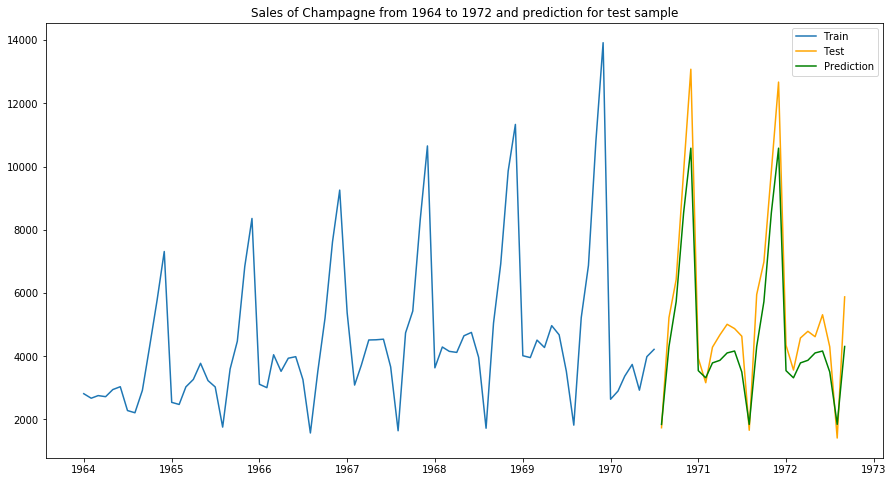

In [29]:
plt.figure(figsize = (15,8))
plt.plot(train, label = 'Train')
plt.plot(test, c = 'orange', label = 'Test')
plt.plot(pred, c = 'green', label = 'Prediction')
plt.title('Sales of Champagne from 1964 to 1972 and prediction for test sample')
plt.legend()
plt.show()

==> Mô hình này có vẻ dự đoán tốt hơn mô hình trên cho những tháng trong năm (không phải tháng đầu năm), còn tháng đầu năm thì hơi sai lệch một chút, nhưng vẫn đảm bảo đúng xu hướng của toàn của tập test

In [30]:
start = datetime(1972,10,1)
end = datetime(1973, 6, 1)

pred_9_month = model_2.predict(start = start, end = end)
pred_9_month

1972-10-01     5727.080037
1972-11-01     8540.151447
1972-12-01    10579.693963
1973-01-01     3543.985966
1973-02-01     3317.570074
1973-03-01     3788.833072
1973-04-01     3871.231826
1973-05-01     4103.987482
1973-06-01     4164.796566
Freq: MS, dtype: float64

In [31]:
pred_9_month = pd.DataFrame(pred_9_month, index = pred_9_month.index, columns = ['Prediction'])
pred_9_month

,Prediction
1972-10-01,5727.080037
1972-11-01,8540.151447
1972-12-01,10579.693963
1973-01-01,3543.985966
1973-02-01,3317.570074
1973-03-01,3788.833072
1973-04-01,3871.231826
1973-05-01,4103.987482
1973-06-01,4164.796566


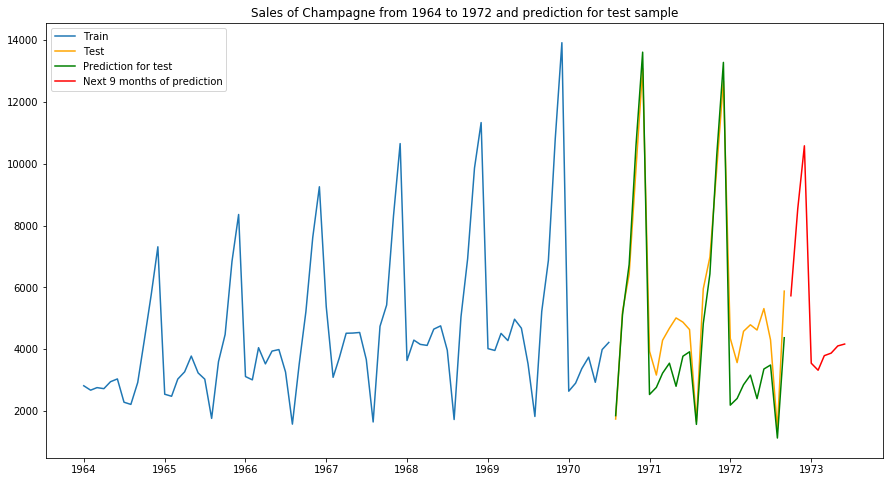

In [32]:
plt.figure(figsize = (15,8))
plt.plot(train, label = 'Train')
plt.plot(test, c = 'orange', label = 'Test')
plt.plot(future, c = 'green', label = 'Prediction for test')
plt.plot(pred_9_month, label = 'Next 9 months of prediction', color = 'red')
plt.title('Sales of Champagne from 1964 to 1972 and prediction for test sample')
plt.legend()
plt.show()

In [33]:
from sklearn.metrics import mean_squared_error, r2_score

print(mean_squared_error(test, future_forcast))
print(r2_score(test, future_forcast))

1449923.257084378
0.8253219562991853


In [34]:
print(mean_squared_error(test, pred))
print(r2_score(test, pred))

1167611.7573436194
0.8593331498213325


==> Mặc dầu mean_square error khá lớn nhưng nó phù hợp với range của dữ liệu. Và r2 score của model 1 khá tốt là 82.5% và model 2 thì cao hơn là 85.9%. Nên ta sẽ chọn mô hình để đi dự đoán tiếp.

In [35]:
print(next_9_months.iloc[len(test):,:])
print(pred_9_month)

             Prediction2
1972-10-01   5966.106098
1972-11-01   9797.575191
1972-12-01  12781.917868
1973-01-01   1677.205590
1973-02-01   1879.524222
1973-03-01   2310.923337
1973-04-01   2606.989314
1973-05-01   1832.286695
1973-06-01   2777.645195
              Prediction
1972-10-01   5727.080037
1972-11-01   8540.151447
1972-12-01  10579.693963
1973-01-01   3543.985966
1973-02-01   3317.570074
1973-03-01   3788.833072
1973-04-01   3871.231826
1973-05-01   4103.987482
1973-06-01   4164.796566


==> Thấy cả 2 mô hình trên đều dự đoán khá tốt cho 9 tháng tới, có thể sai số là đáng kể nhưng ít nhất ta vẫn có thể thấy được xu hướng của 9 tháng tới. Dự đoán của mô hình thứ 2 (table bên dưới) là đáng tin cậy hơn do r2 score cao hơn.